In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras import Model,layers
import tensorflow as tf
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SpatialDropout1D
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer

from keras import callbacks
from keras.callbacks import CSVLogger

import os

#traindata = pd.read_csv('preprocessed_train_multiclass(a)_new.csv', header=None)
#testdata = pd.read_csv('preprocessed_test_multiclass(a)_new.csv', header=None)
'''
X=pd.read_csv (r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli121.csv", header=None )
T=pd.read_csv (r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli11.csv", header=None )
C=pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli1_label.csv",header=None)
Y=pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli2_label.csv",header=None)
X = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain_1.csv", header=None)
Y = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\train_label.csv", header=None)

T = pd.read_csv(r"C:\e\学习资料\02-03\pva1\pva_1.csv", header=None)
C = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\pva1\pva_label.csv", header=None)'''
f1 = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\sptrain1_f1_bert.csv", header=None)
f2 = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\sptrain1_f2_bert.csv", header=None)
f1_label = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\f1_label.csv", header=None)
f2_label = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\f2_label.csv", header=None)

X = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\sptrain1_t1_bert.csv", header=None)
Y = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\t1_label.csv", header=None)
X = X.append ( f1 )
X = X.append ( f2 )
Y = Y.append ( f1_label )
Y = Y.append ( f2_label )

T = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\sptrain1_t2_bert.csv", header=None)
C = pd.read_csv(r"C:\e\学习资料\02-03\ptrain1\tr1\t\t2_label.csv", header=None)

X1 = X
T1 = T
X1.fillna(0,inplace=True)
X1.replace([np.inf,-np.inf],1,inplace=True)
T1.fillna(0,inplace=True)
T1.replace([np.inf,-np.inf],1,inplace=True)
#X1.value_counts('Label')
'''
for index in X1.columns:
    X1[index]=X1[index].fillna(0,inplace=True)
    X1[index]=X1[index].replace([np.inf,-np.inf],1,inplace=True)
'''

#scaler = Normalizer().fit(X1)
#trainX = scaler.transform(X1)
trainX =  np.array(X1)

#scaler = Normalizer().fit(T1)
#testT = scaler.transform(T1)
testT = np.array(T1)
y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

# reshape input to be [samples, time steps, features]
X_train = trainX
X_test = testT

print (trainX.shape )
X_train = np.reshape(trainX, (trainX.shape[0],32,24))
X_test = np.reshape(testT, (testT.shape[0],32,24))

# Add a channels dimension
X_train = X_train[..., tf.newaxis].astype("float32")
X_test = X_test[..., tf.newaxis].astype("float32")
batch_size = 50

print (X_train.shape )

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train1)).shuffle(1000000).batch(50)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test1)).batch(50)


class MyModel(Model):
    #
    def __init__(self):
        #
        super(MyModel, self).__init__()
        '''
        self.lstm1=LSTM(50,input_shape=(1, 768), return_sequences= True )
        self.drop1=Dropout(0.01)
        self.lstm2=LSTM(50,return_sequences=True)
        self.drop2=Dropout(0.01)
        self.lstm3=LSTM(50, return_sequences=False)
        self.drop3=Dropout(0.01)
        '''
        self.flatten0=layers.Flatten(input_shape=(768,1))
        self.d0=layers.Dense(units=64,activation='relu',)
        self.cov1=layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 24, 1))
        self.pl1=layers.MaxPooling2D((2, 2))
       
        self.cov2=layers.Conv2D(64, (3, 3), activation='relu')
        self.pl2=layers.MaxPooling2D((2, 2))
        self.cov3=layers.Conv2D(64, (3, 3), activation='relu')
        self.pl3=layers.MaxPooling2D((2, 2))
        #self.flatten=layers.Flatten()
        #self.d0=layers.Dense(64, activation='relu')
        #self.drop1=Dropout(0.5)
        self.cov4=layers.Conv2D(64, (3, 3), activation='relu',padding='same')
        self.pl4=layers.MaxPooling2D((2, 2))
        self.cov5=layers.Conv2D(64, (3, 3), activation='relu',padding='same')
        self.flatten1=layers.Flatten()
        self.d1=layers.Dense(64, activation='relu')
        self.drop2=Dropout(0.5)
        self.d2=Dense(9)
        self.activation1=Activation('softmax')

    def call(self, x):
        #
        
        x = self.cov1(x)
        x = self.pl1(x)
        x = self.cov2(x)
        x = self.pl2(x)
        x = self.cov3(x)
       
       # x = self.pl3(x)
       # x = self.flatten(x)
       # x = self.d0(x)
       # x = self.drop1(x)
       # x = self.cov4(x)
       # x = self.pl4(x)
       # x = self.cov5(x)
        x = self.flatten1(x)
       # x = self.flatten0(x)
        x = self.d0(x)
        x = self.d1(x)
        x = self.drop2(x)
        x = self.d2(x)
        return self.activation1(x)

# Create an instance of the model
model = MyModel()

loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')


@tf.function
def train_step(traind, labels):
    
    with tf.GradientTape() as tape:
        #
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
        predictions = model(traind, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
    
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)
    
EPOCHS = 20

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
    )

#!mkdir -p saved_model
#model.save('saved_model/temp/bert_model')
'''
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)
'''


(87962, 768)
(87962, 32, 24, 1)


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node my_model_1/conv2d_5/Conv2D
 (defined at C:\d\anaconda\lib\site-packages\keras\layers\convolutional.py:231)
]] [Op:__inference_train_step_1832]

Errors may have originated from an input operation.
Input Source operations connected to node my_model_1/conv2d_5/Conv2D:
In[0] traind (defined at C:\Users\maijieai\AppData\Local\Temp/ipykernel_21876/2266935657.py:203)	
In[1] my_model_1/conv2d_5/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "C:\d\anaconda\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\d\anaconda\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\d\anaconda\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\d\anaconda\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\d\anaconda\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\maijieai\AppData\Local\Temp/ipykernel_21876/2266935657.py", line 203, in <module>
>>>     train_step(images, labels)
>>> 
>>>   File "C:\Users\maijieai\AppData\Local\Temp/ipykernel_21876/2266935657.py", line 174, in train_step
>>>     predictions = model(traind, training=True)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\maijieai\AppData\Local\Temp/ipykernel_21876/2266935657.py", line 132, in call
>>>     x = self.cov1(x)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\layers\convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "C:\d\anaconda\lib\site-packages\keras\layers\convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras import Model,layers
import tensorflow as tf
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SpatialDropout1D
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer

from keras import callbacks
from keras.callbacks import CSVLogger

import os

#traindata = pd.read_csv('preprocessed_train_multiclass(a)_new.csv', header=None)
#testdata = pd.read_csv('preprocessed_test_multiclass(a)_new.csv', header=None)
'''
X=pd.read_csv (r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli121.csv", header=None )
T=pd.read_csv (r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli11.csv", header=None )
C=pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli1_label.csv",header=None)
Y=pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain2_sli2_label.csv",header=None)
X = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\ptrain_1.csv", header=None)
Y = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\train_label.csv", header=None)

T = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\pva1\pva_1.csv", header=None)
C = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\pva1\pva_label.csv", header=None)'''
f1 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\sptrain1_f1_bert.csv", header=None)
f2 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\sptrain1_f2_bert.csv", header=None)
f1_label = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\f1_label.csv", header=None)
f2_label = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\f2_label.csv", header=None)

X = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\sptrain1_t1_bert.csv", header=None)
Y = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\t1_label.csv", header=None)
X = X.append ( f1 )
X = X.append ( f2 )
Y = Y.append ( f1_label )
Y = Y.append ( f2_label )

T = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\sptrain1_t2_bert.csv", header=None)
C = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t\t2_label.csv", header=None)

X1 = X
T1 = T
X1.fillna(0,inplace=True)
X1.replace([np.inf,-np.inf],1,inplace=True)
T1.fillna(0,inplace=True)
T1.replace([np.inf,-np.inf],1,inplace=True)
#X1.value_counts('Label')
'''
for index in X1.columns:
    X1[index]=X1[index].fillna(0,inplace=True)
    X1[index]=X1[index].replace([np.inf,-np.inf],1,inplace=True)
'''

#scaler = Normalizer().fit(X1)
#trainX = scaler.transform(X1)
trainX =  np.array(X1)

#scaler = Normalizer().fit(T1)
#testT = scaler.transform(T1)
testT = np.array(T1)
y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

# reshape input to be [samples, time steps, features]
X_train = trainX
X_test = testT

print (trainX.shape )
X_train = np.reshape(trainX, (trainX.shape[0],32,24))
X_test = np.reshape(testT, (testT.shape[0],32,24))

# Add a channels dimension
X_train = X_train[..., tf.newaxis].astype("float32")
X_test = X_test[..., tf.newaxis].astype("float32")
new_model = tf.keras.models.load_model('saved_model/temp/bert_model')

# Check its architecture
new_model.summary()
# Evaluate the restored model
optimizer = tf.keras.optimizers.Adam()

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

new_model.compile(optimizer, test_loss)
loss, acc = new_model.evaluate(X_test, y_test1, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(X_test).shape)

(87962, 768)
Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  32832     
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_16 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_17 (Conv2D)           multiple      

In [10]:
X1 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\sptrain1_1_bert.csv", header=None)
Y1 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t1_2_label.csv", header=None)

T1 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\sptrain1_2_bert.csv", header=None)
C1 = pd.read_csv(r"E:\学习心得\data\cic-ids2018\02-03\ptrain1\tr1\t2_2_label.csv", header=None)

X1 = X1.append ( T1 )
Y1 = Y1.append ( C1 )
testX =  np.array(X1)
labely = np.array ( Y1 )
X_test = np.reshape(testX, (testX.shape[0],32,24))
#X_test = np.reshape(testT, (testT.shape[0],32,24))

# Add a channels dimension
X_test = X_test[..., tf.newaxis].astype("float32")
loss, acc = new_model.evaluate(X_test, labely, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(X_test).shape)

2749/2749 - 10s - loss: 0.9137 - train_loss: 0.8519
Restored model, accuracy: 85.19%
(87966, 9)


In [11]:
loss, acc = new_model.evaluate(X_train, y_train1, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(X_train).shape)

2749/2749 - 8s - loss: 0.9107 - train_loss: 0.8575
Restored model, accuracy: 85.75%
(87962, 9)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
data=np.arange(0,1.1,0.01)
'''
plt.title('lines')   #添加标题名称，可以指定位置、颜色、字体大小等参数
plt.xlabel('x')      #添加x轴名称，可以指定位置、颜色、字体大小等参数
plt.ylabel('y')      #添加y轴名称，可以指定位置、颜色、字体大小等参数
plt.xlim((0,1))      #指定x轴范围，只能确定一个数值区间，无法使用字符串标识
plt.ylim((0,1))      #指定y轴范围，只能确定一个数值区间，无法使用字符串标识
plt.xticks([0,0.2,0.4,0.6,0.8,1])  #指定x轴刻度的数目与取值
plt.yticks([0,0.2,0.4,0.6,0.8,1])  #指定y轴刻度的数目与取值
plt.plot(data,data**2)             #绘图函数y=x^2
plt.plot(data,data**4)             #绘图函数y=x^4
plt.legend(['y=x^2'])              #指定当前图形的图例，可以指定图例的大小、位置、标签等
#plt.savefig('.../a.png')           #保存绘制的图形路径，可以指定图形的分辨率、边缘的颜色等参数
plt.show()    
''' 
                     #在本机显示图形


"\nplt.title('lines')   #添加标题名称，可以指定位置、颜色、字体大小等参数\nplt.xlabel('x')      #添加x轴名称，可以指定位置、颜色、字体大小等参数\nplt.ylabel('y')      #添加y轴名称，可以指定位置、颜色、字体大小等参数\nplt.xlim((0,1))      #指定x轴范围，只能确定一个数值区间，无法使用字符串标识\nplt.ylim((0,1))      #指定y轴范围，只能确定一个数值区间，无法使用字符串标识\nplt.xticks([0,0.2,0.4,0.6,0.8,1])  #指定x轴刻度的数目与取值\nplt.yticks([0,0.2,0.4,0.6,0.8,1])  #指定y轴刻度的数目与取值\nplt.plot(data,data**2)             #绘图函数y=x^2\nplt.plot(data,data**4)             #绘图函数y=x^4\nplt.legend(['y=x^2'])              #指定当前图形的图例，可以指定图例的大小、位置、标签等\n#plt.savefig('.../a.png')           #保存绘制的图形路径，可以指定图形的分辨率、边缘的颜色等参数\nplt.show()    \n"

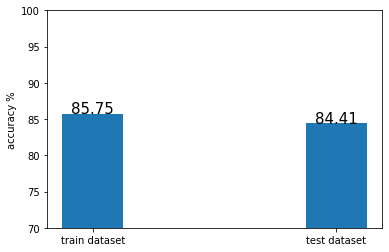

In [5]:
#plt.title('')   #添加标题名称，可以指定位置、颜色、字体大小等参数
#plt.xlabel('')      #添加x轴名称，可以指定位置、颜色、字体大小等参数
plt.bar(['train dataset','test dataset'],[85.75,84.41],width=0.25)
plt.ylabel('accuracy %')      #添加y轴名称，可以指定位置、颜色、字体大小等参数
#plt.xlim((70,100))      #指定x轴范围，只能确定一个数值区间，无法使用字符串标识
plt.ylim((70,100))      #指定y轴范围，只能确定一个数值区间，无法使用字符串标识
#plt.xticks([' ','训练集',' ','测试集',' '])  #指定x轴刻度的数目与取值
plt.yticks([70,75,80,85,90,95,100])  #指定y轴刻度的数目与取值
#plt.plot([85.75,84.41])             #绘图函数y=x^2
#plt.plot(data,data**4)             #绘图函数y=x^4
#plt.legend(['y=x^2'])              #指定当前图形的图例，可以指定图例的大小、位置、标签等
#plt.savefig('.../a.png')    #保存绘制的图形路径，可以指定图形的分辨率、边缘的颜色等参数
plt.text('train dataset',85.75,85.75,ha='center',fontsize=15)
plt.text('test dataset',84.41,84.41,ha='center',fontsize=15)
plt.show()                         #在本机显示图形
